# EfficientNet

### In this notebook I have used Transfer Learning and Fine Tuning to train a CNN on Aptos_2019 Diabetic Retinopathy Data available on Kaggle. The dataset has 3662 images in the training directory. 
### The dataset used for training is cropped, resized and preprocessed by me before passing it to the CNN. Efficient Net gave an average accuracy metric during its 1st trial and I am sure the network can perform much better.

In [23]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

In [24]:
from tensorflow.python.keras.applications.efficientnet import EfficientNetB3

In [25]:
train_dir = "2019/train/train_clahe/"
test_dir = "2019/test/test_clahe/"

In [26]:
model = EfficientNetB3(input_shape=(100,100,3), include_top = False, weights = "imagenet")

In [27]:
model.summary()

Model: "efficientnetb3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 100, 100, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 100, 100, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 101, 101, 3)  0           normalization_1[0][0]            
_____________________________________________________________________________________

__________________________________________________________________________________________________


In [28]:
last_layer = model.get_layer("block6e_add")
#last_layer = model.output
last = last_layer.output
last.shape

TensorShape([None, 4, 4, 232])

In [30]:
#X = GlobalAveragePooling2D()(model.output)
X = Flatten()(last)
X = Dense(128, activation="relu")(X)
X = BatchNormalization()(X)
X = Dropout(0.3)(X)
X = Dense(128, activation="relu")(X)
X = BatchNormalization()(X)
X = Dropout(0.3)(X)
final_output = Dense(5, activation="softmax", name="final_output")(X)

In [31]:
final_model = Model(model.input, final_output)

In [32]:
final_model.compile(optimizer = Adam(lr=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [33]:
final_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 100, 100, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 100, 100, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 101, 101, 3)  0           normalization_1[0][0]            
____________________________________________________________________________________________

In [34]:
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   horizontal_flip=True,
                                   rotation_range=30,
                                   shear_range = 0.1)

test_datagen = ImageDataGenerator(rescale=1./255.)

In [35]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(100,100),
                                                    batch_size=24,
                                                    shuffle=True,
                                                    class_mode="categorical")

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(100,100),
                                                  batch_size=24,
                                                  shuffle=True,
                                                  class_mode="categorical")

Found 3000 images belonging to 5 classes.
Found 662 images belonging to 5 classes.


In [36]:
history = final_model.fit(train_generator,
                          epochs=5,
                          steps_per_epoch = 3000//32,
                          validation_data = test_generator,
                          validation_steps = 662/32,
                          verbose=1)

Epoch 1/5
93/93 [==============================] - 626s 7s/step - loss: 1.8616 - accuracy: 0.3571 - val_loss: 1.8176 - val_accuracy: 0.0456
Epoch 2/5
93/93 [==============================] - 361s 4s/step - loss: 1.3194 - accuracy: 0.5381 - val_loss: 1.9208 - val_accuracy: 0.2996
Epoch 3/5
93/93 [==============================] - 348s 4s/step - loss: 1.1563 - accuracy: 0.6062 - val_loss: 1.4447 - val_accuracy: 0.4413
Epoch 4/5
93/93 [==============================] - 348s 4s/step - loss: 1.0613 - accuracy: 0.6452 - val_loss: 1.4683 - val_accuracy: 0.4737
Epoch 5/5
93/93 [==============================] - 423s 5s/step - loss: 0.9937 - accuracy: 0.6595 - val_loss: 1.3624 - val_accuracy: 0.5556


In [37]:
final_model.save("2019_2.h5")

In [38]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(len(acc))

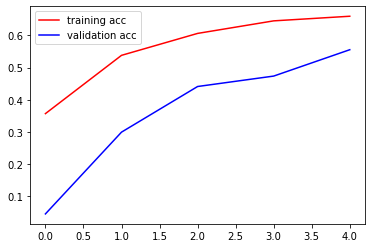

In [39]:
plt.plot(epochs,acc,"r",label="training acc")
plt.plot(epochs,val_acc,"b",label="validation acc")
plt.legend(loc=0)
plt.show()

In [40]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

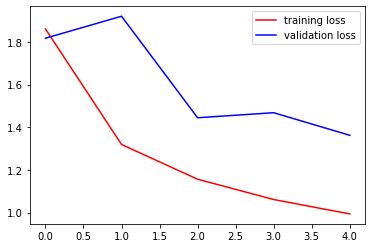

In [41]:
plt.plot(epochs,loss,"r",label="training loss")
plt.plot(epochs,val_loss,"b",label="validation loss")
plt.legend(loc=0)
plt.show()

In [42]:
history = final_model.fit(train_generator,
                          epochs=3,
                          steps_per_epoch = 3000//24,
                          validation_data = test_generator,
                          validation_steps = 662/24,
                          verbose=1)

Epoch 1/3
125/125 [==============================] - 525s 4s/step - loss: 0.9232 - accuracy: 0.6867 - val_loss: 12.9948 - val_accuracy: 0.4970
Epoch 2/3
125/125 [==============================] - 506s 4s/step - loss: 0.8974 - accuracy: 0.6743 - val_loss: 1.2393 - val_accuracy: 0.5876
Epoch 3/3
125/125 [==============================] - 652s 5s/step - loss: 0.8763 - accuracy: 0.6957 - val_loss: 0.8702 - val_accuracy: 0.6450
